### Import Data & Python Packages

In [57]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
train = pd.read_csv("C:/Users/praneetha/Documents/project/predicting house prices/Predicting-House-Prices-In-Bengaluru-Train-Data.csv")


In [3]:
test=pd.read_csv("C:/Users/praneetha/Documents/project/predicting house prices/Predicting-House-Prices-In-Bengaluru-test-Data.csv")

In [4]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


### Data Quality & Missing Value Assessment

In [6]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))

The train data has 13320 rows and 9 columns


In [7]:
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The test data has 1480 rows and 9 columns


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
area_type       1480 non-null object
availability    1480 non-null object
location        1480 non-null object
size            1478 non-null object
society         854 non-null object
total_sqft      1480 non-null object
bath            1473 non-null float64
balcony         1411 non-null float64
price           0 non-null float64
dtypes: float64(3), object(6)
memory usage: 104.1+ KB


In [10]:
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
test.isnull().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [12]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

location    0.000075
size        0.001201
bath        0.005480
balcony     0.045721
society     0.413063
dtype: float64

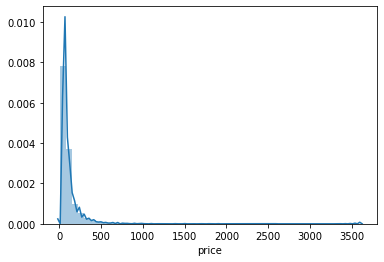

In [13]:
sns.distplot(train['price'])

In [14]:
#skewness
print ("The skewness of Price is {}".format(train['price'].skew()))

The skewness of Price is 8.064468821273252


Skewness is 0.8261876136371142


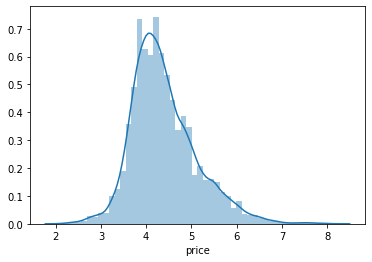

In [15]:
#now transforming the target variable
target = np.log(train['price'])
print ('Skewness is', target.skew())
sns.distplot(target)

### Total Sqft - Preprocessing And Adjustments

In [16]:
import re
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

In [17]:
train['total_sqft'] = train.total_sqft.str.split('-').apply(preprocess_total_sqft)
test['total_sqft'] = test.total_sqft.str.split('-').apply(preprocess_total_sqft)

### Missing Values & Adjustments

In [18]:
train['size']=train['size'].str.replace("Bedroom"," ",case=False)
train['size']=train['size'].replace("1 RK","1 BHK")
train['size']=train['size'].str.replace("BHK"," ")

In [19]:
train=train.astype({"size":'float64'}) 

In [20]:
replace_area_type = {'Super built-up  Area': 1, 'Built-up  Area': 2, 'Plot  Area': 3, 'Carpet  Area': 4}
train['area_type'] = train['area_type'].map(replace_area_type)
test['area_type'] = test['area_type'].map(replace_area_type)

In [21]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,3,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,2,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,1,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,1,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [22]:
def replace_availabilty(st):
    if st == 'Ready To Move':
        return 0
    elif st == 'Immediate Possession':
        return 1
    else:
        return 2

In [23]:
train['availability'] = train.availability.apply(replace_availabilty)
test['availability'] = test.availability.apply(replace_availabilty)

In [24]:
train["location"].fillna("Location Not Provided",inplace=True)
test["location"].fillna("Location Not Provided",inplace=True)

In [25]:
from sklearn import preprocessing
location_encoder = preprocessing.LabelEncoder()
train['location']= location_encoder.fit_transform(train['location'])
test['location']= location_encoder.fit_transform(test['location'])

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null int64
availability    13320 non-null int64
location        13320 non-null int32
size            13304 non-null float64
society         7818 non-null object
total_sqft      13320 non-null float64
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(5), int32(1), int64(2), object(1)
memory usage: 884.6+ KB


In [27]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [28]:
train.drop('society',axis=1,inplace=True)
test.drop('society',axis=1,inplace=True)

In [29]:
train.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,2,419,2.0,1056.0,2.0,1.0,39.07
1,3,0,317,4.0,2600.0,5.0,3.0,120.00
2,2,0,1180,3.0,1440.0,2.0,3.0,62.00
3,1,0,757,3.0,1521.0,3.0,1.0,95.00
4,1,0,716,2.0,1200.0,2.0,1.0,51.00


## Exploratory Data Analysis

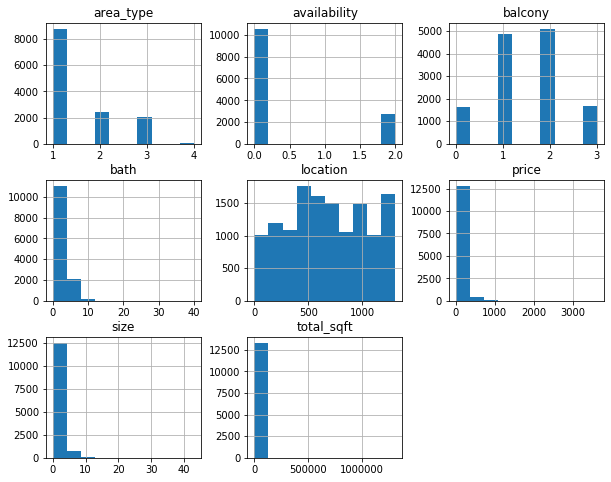

In [58]:
train.hist()
plt.show()

In [31]:
numeric_data = train.select_dtypes(include=[np.number])

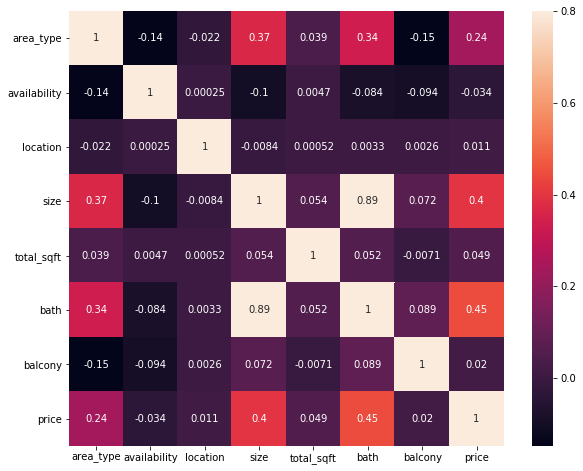

In [59]:
corr = numeric_data.corr()
sns.heatmap(corr,vmax=.8, square=True,annot=True)

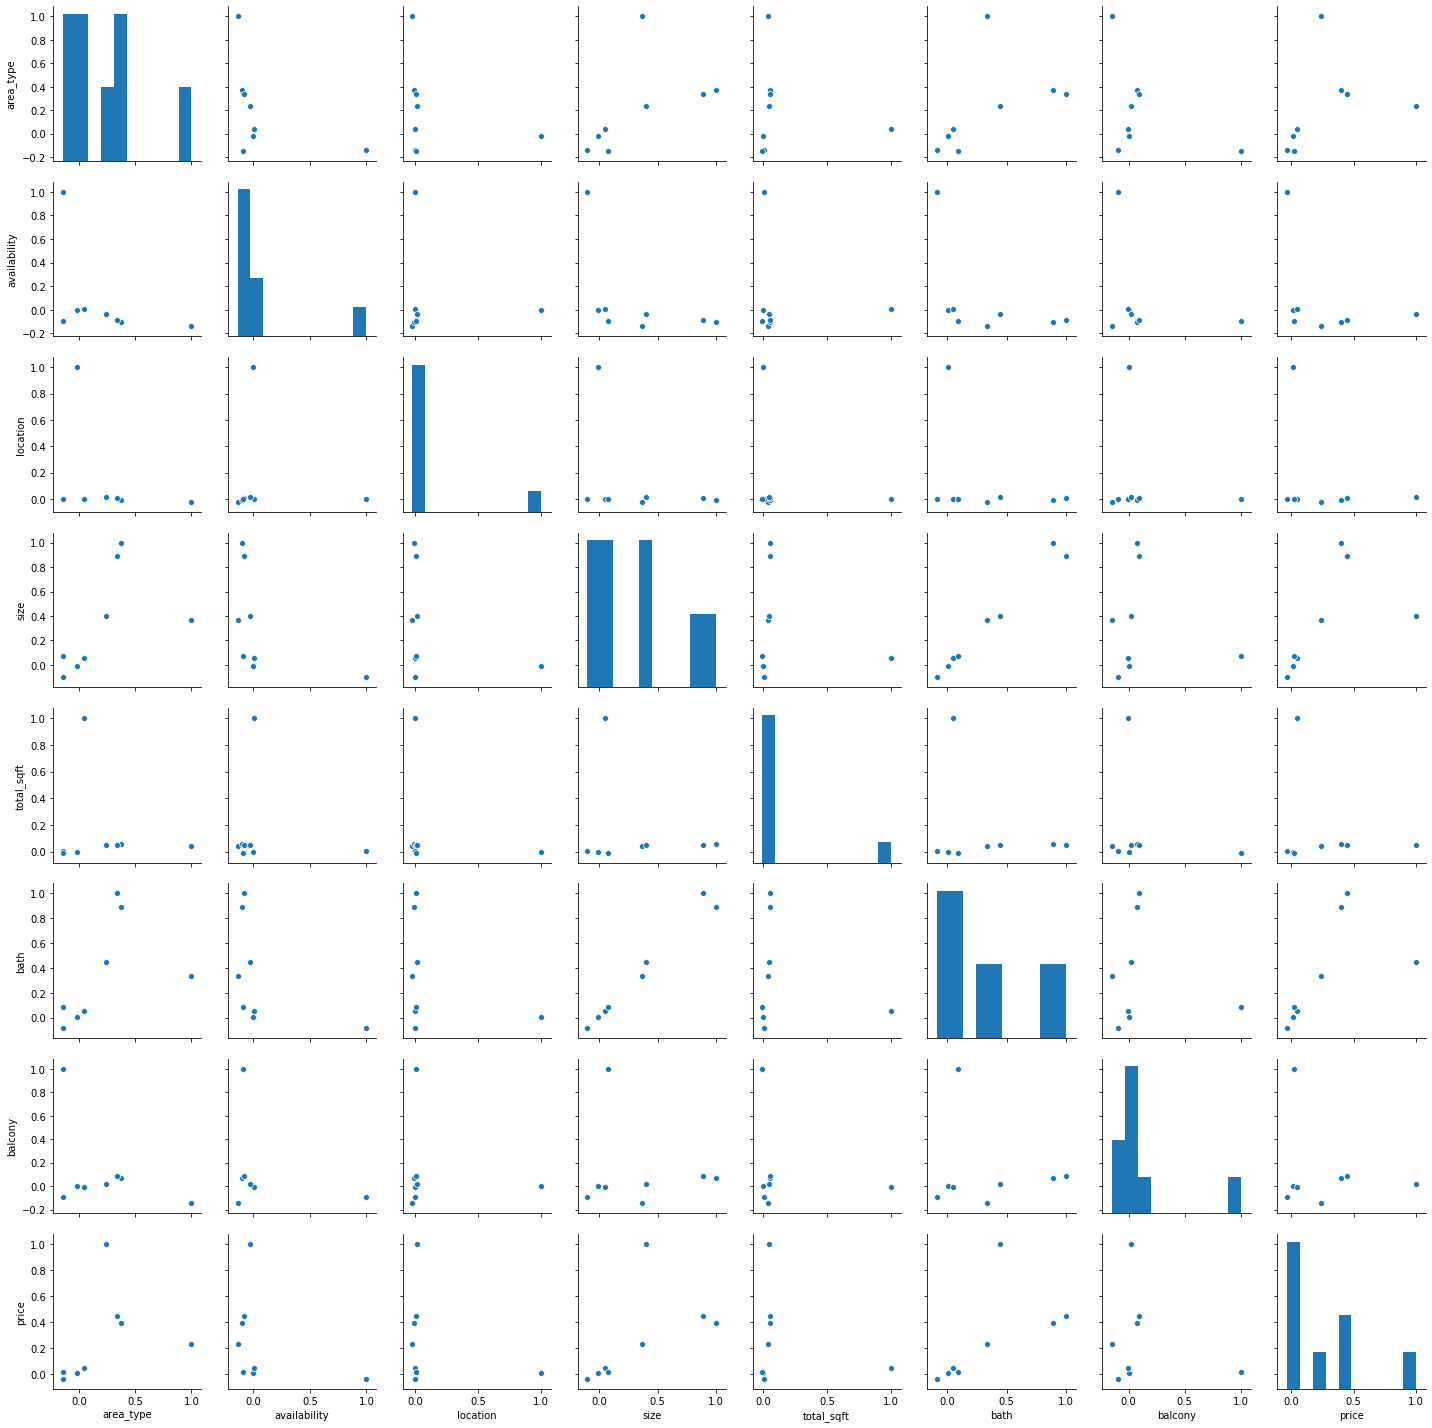

In [60]:
sns.pairplot(corr, size = 2.5)
plt.show();

In [34]:
test['size']=test['size'].str.replace("Bedroom"," ",case=False)
test['size']=test['size'].replace("1 RK","1 BHK")
test['size']=test['size'].str.replace("BHK"," ")

In [35]:
test=test.astype({"size":'float64'}) 

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 8 columns):
area_type       1480 non-null int64
availability    1480 non-null int64
location        1480 non-null int32
size            1478 non-null float64
total_sqft      1480 non-null float64
bath            1480 non-null float64
balcony         1480 non-null float64
price           1480 non-null float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 86.8 KB


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
test.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,0,95,2.0,1225.0,2.0,2.0,0.0
1,3,0,30,9.0,2400.0,9.0,2.0,0.0
2,3,2,185,4.0,1650.0,5.0,2.0,0.0
3,1,0,269,3.0,1322.0,3.0,1.0,0.0
4,1,0,274,2.0,1161.0,2.0,1.0,0.0


### Train/Test Split

In [39]:
from sklearn.model_selection import train_test_split
X=train.drop('price',axis=1)
y=train['price']

In [40]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1111, random_state=0)

In [41]:
X_train.shape

(11840, 7)

In [42]:
X_test.shape

(1480, 7)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## RandomForest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
re=regressor.fit(X_train, y_train)   
pred1=re.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,pred1)

0.6937457044927628

## GradientBoosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor(n_estimators=900, max_depth=5)
gr=reg.fit(X_train,y_train)
pred2=gr.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,pred2)

0.7170214790835385

## XGB Regressor

In [48]:
import xgboost as xgb
xg_reg=xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=6000,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)
xg=xg_reg.fit(X_train,y_train)
pred3=xg.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,pred3)

0.6926973821661608

## Submission

In [52]:
sub = pd.DataFrame({'Prices':pred2})
sub.head()

,Prices
0,44.140201
1,133.210641
2,96.234987
3,96.021681
4,115.360796


In [56]:
sub.to_csv("price_submission.csv",index=False)